<a href="https://colab.research.google.com/github/Sheetal-ai/Churn_modelling_ANN/blob/main/mnist_cnn_tuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 5.0MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=65aad9128b8c9510d70393aa9eaf59fcb2e9ccc7013714327244af5ec7e0112e
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=8bd982b98dcd365748b1c1b7cbd8d4b7336242fd5b506d678b6eeccc669be6d6
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.4.1


In [3]:
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_image,train_label),(test_image,test_label) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
train_image = train_image/255.0
test_image = test_image/255.0

In [6]:
train_image.shape

(60000, 28, 28)

In [7]:
test_image.shape

(10000, 28, 28)

In [8]:
train_label[9]

5

In [10]:
from keras import  Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPool2D

In [17]:
def build_model(hp):
  model = Sequential()
  model.add(Conv2D(filters=hp.Int('conv_1_filter',min_value=32,max_value=128,step=16),
               kernel_size= hp.Choice('conv1_kernel',values = [3,5]),
               activation='relu',
               input_shape = (28,28,1)))
  # model.add(MaxPool2D(pool_size=(2,2)))
  for i in range(hp.Int('no of conv layers',1,4)):
        model.add(Conv2D(filters=hp.Int('Conv_2_filter',min_value = 32,max_value =128,step =16),
               kernel_size=hp.Choice('COnv2_filter_size',values=[3,5]),
               activation = 'relu'))
  model.add(Flatten())
  model.add(Dense(units= hp.Int('No of nodes',min_value=32,max_value=128,step=16),
              activation='relu',kernel_initializer='he_uniform'))
  model.add(Dropout(0.3))
  model.add(Dense(units=10,activation='softmax'))         
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
               loss=keras.losses.sparse_categorical_crossentropy,
               metrics =['accuracy'])
  return model


In [18]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [19]:
tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=5)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [15]:
train_image = train_image.reshape(len(train_image),28,28,1)
len(train_image)

60000

In [20]:
tuner.search(train_image,train_label,epochs=3,validation_split=0.2)

Trial 2 Complete [00h 00m 27s]
val_accuracy: 0.890749990940094

Best val_accuracy So Far: 0.890749990940094
Total elapsed time: 00h 00m 53s
INFO:tensorflow:Oracle triggered exit


In [21]:
model=tuner.get_best_models(num_models=1)[0]

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 80)        2080      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 48)        34608     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 48)        20784     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 48)        20784     
_________________________________________________________________
flatten (Flatten)            (None, 15552)             0         
_________________________________________________________________
dense (Dense)                (None, 80)                1244240   
_________________________________________________________________
dropout (Dropout)            (None, 80)                0

In [23]:
model.fit(train_image,train_label,epochs=10,validation_split=0.2,initial_epoch=3)

Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2601 - accuracy: 0.9059 - val_loss: 0.2571 - val_accuracy: 0.9080
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2208 - accuracy: 0.9186 - val_loss: 0.2647 - val_accuracy: 0.9081
Epoch 6/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1939 - accuracy: 0.9263 - val_loss: 0.2544 - val_accuracy: 0.9138
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1668 - accuracy: 0.9365 - val_loss: 0.2669 - val_accuracy: 0.9116
Epoch 8/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1476 - accuracy: 0.9440 - val_loss: 0.2765 - val_accuracy: 0.9138
Epoch 9/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1266 - accuracy: 0.9511 - val_loss: 0.2741 - val_accuracy: 0.9158
Epoch 10/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1154 - accuracy: 0.9571 - val_loss: 0.3344 - val_accuracy

In [24]:
test_image = test_image.reshape(len(test_image),28,28,1)
y_predict = model.predict(test_image)

In [25]:
import numpy as np
np.argmax(y_predict[5])



1

In [26]:
test_label[5]

1

Actual image 9
Predicted image 9


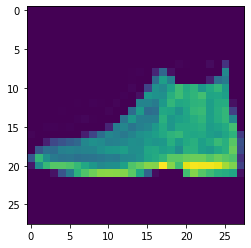

In [32]:
#Visualize
import matplotlib.pyplot as plt
plt.imshow(test_image[0].reshape(28,28))
print('Actual image',test_label[0])
print('Predicted image',np.argmax(y_predict[0]))



Actual image 4
Predicted image 4


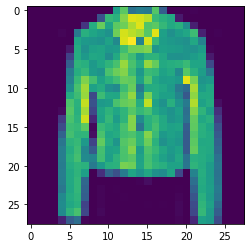

In [33]:
plt.imshow(test_image[10].reshape(28,28))
print('Actual image',test_label[10])
print('Predicted image',np.argmax(y_predict[10]))
